In [2]:
print("Hello World")

Hello World


In [3]:
import numpy as np

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
def gaussian_process_regressor():
    """
    This function is used to test the gaussian process regressor.
    """
    # Generate data
    x = np.linspace(0, 1, 100)
    # y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, 100)
    y = 20 + 

    # Fit the model
    
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(x[:, np.newaxis], y)

    # Predict
    x_new = np.linspace(0, 1, 1000)
    y_new = gpr.predict(x_new[:, np.newaxis])

    # Plot the results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label="Training data")
    plt.plot(x_new, y_new, label="Prediction")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    return gpr

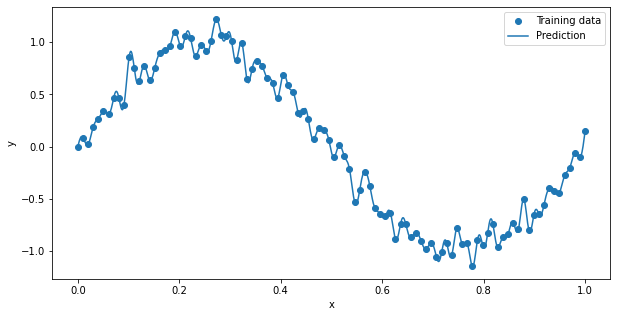

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

In [7]:
gaussian_process_regressor()